<a href="https://colab.research.google.com/github/swathivenkatesan87/24ADI003_24BAD122-EXP-5/blob/main/Ex_5_24bad122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Swathi
Roll No: 24BAD122

Dataset Loaded Successfully

First 5 rows:
          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980            

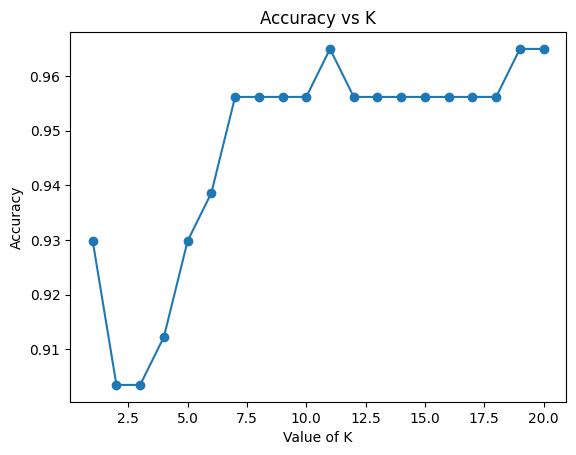


Best K Value: 11

Accuracy: 0.9649122807017544

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



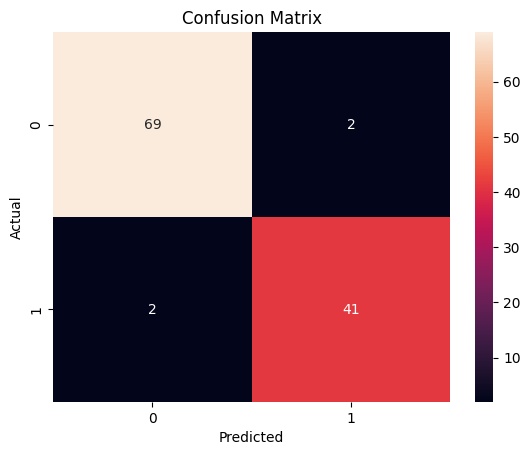


Number of Misclassified Samples: 4


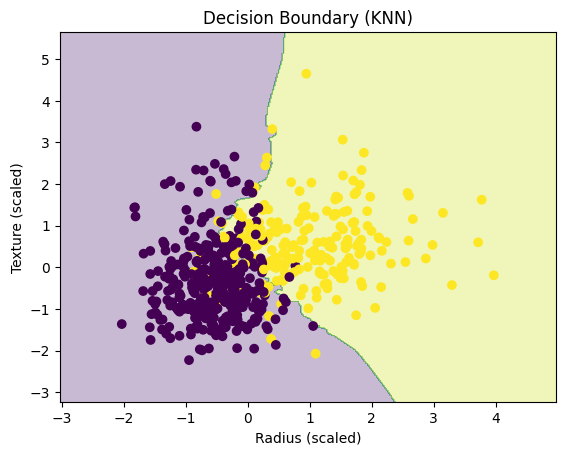


Program Completed Successfully
Name: Swathi | Roll No: 24BAD122


In [ ]:
# ---------------------------------------------
# KNN Classification – Breast Cancer Dataset
# Name : Swathi
# Roll No : 24BAD122
# ---------------------------------------------

# 1. Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2. Load Dataset
# Download the dataset from Kaggle and place it in the same folder
df = pd.read_csv("breast-cancer.csv")

print("Name: Swathi")
print("Roll No: 24BAD122")
print("\nDataset Loaded Successfully\n")

# 3. Data Inspection
print("First 5 rows:\n", df.head())
print("\nDataset Info:\n")
print(df.info())

print("\nMissing Values:\n", df.isnull().sum())


# 4. Select Features and Target
features = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean']
X = df[features]

y = df['diagnosis']

# Encode target labels (B=0, M=1)
le = LabelEncoder()
y = le.fit_transform(y)


# 5. Feature Scaling (Important for KNN)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 6. Train Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


# 7 & 8. Train KNN and experiment with K values

k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

# Plot Accuracy vs K
plt.figure()
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K")
plt.show()

# Choose best K
best_k = k_values[np.argmax(accuracy_scores)]
print("\nBest K Value:", best_k)


# 9. Train final model using best K

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


# 10. Evaluation

print("\nAccuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# 11. Identify Misclassified Cases

misclassified = np.where(y_test != y_pred)
print("\nNumber of Misclassified Samples:", len(misclassified[0]))


# 12. Decision Boundary (Using only two features)
# radius_mean & texture_mean


X2 = df[['radius_mean', 'texture_mean']]
X2 = StandardScaler().fit_transform(X2)

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y, test_size=0.2, random_state=42
)

model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X2_train, y2_train)

# Create meshgrid
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.3)

plt.scatter(X2[:, 0], X2[:, 1], c=y)
plt.xlabel("Radius (scaled)")
plt.ylabel("Texture (scaled)")
plt.title("Decision Boundary (KNN)")
plt.show()

print("\nProgram Completed Successfully")
print("Name: Swathi | Roll No: 24BAD122")